# Fast EMRI Waveforms Example

Fast EMRI Waveforms (FEW) can be downloaded from: https://urldefense.com/v3/__https://bhptoolkit.org/FastEMRIWaveforms_main.html__;!!JYXjzlvb!hC5VmNyorNkdDTKMwu-F3LlCdj_WPuyGJTGJNfZKzurzoptO2di_lVSLyV_A6nqeJIbU5_LeD6ZljoS3UymfppS2_SU$ . Take a look at the `README.md` file for installation instructions.

This tutorial is just a small subset of the extensive tutorial's included with the package.

Here we will use FEW on the CPU but it works seamless with GPUs where it can generate year-long waveforms in subsecond times. FEW is also very modular making it easy to extend as new self-force calculations become available. Michael Katz (the lead developer) has done a really great job with the FEW package.

In [148]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

## Quick start: adiabatic Schwarzschild model

Let's say you just want to generate a waveform using FEW. Let's do that using the relativistic Schwarzschild model presented in Phys. Rev. Lett. 126, 051102 (2021), [arXiv:2008.06071](https://arxiv.org/abs/2008.06071) and Phys. Rev. D 104, 064047 (2021), [arXiv:2104.04582](https://arxiv.org/abs/2104.04582). In this model the trajectory is driven by using a flux-balance law and the waveform amplitudes are interpolated using a ROMAN network (Reduced-Order Modeling with Artifical Neurons -- see Phys. Rev. Lett. 122, 211101, [arXiv:1811.05491](https://arxiv.org/abs/1811.05491)).

First we need to important the generic interface and the waveform model we want to use. The generic interface returns the waveform in the solar system barycenter frame.

In [11]:
from few.waveform import GenerateEMRIWaveform, FastSchwarzschildEccentricFlux

This next command will download all the necessary data for the relativistic model the first time you run it

In [7]:
gen_wave = GenerateEMRIWaveform("FastSchwarzschildEccentricFlux")

We now need to set the parameters of the binary

In [42]:
# parameters
T = 1  # years
dt = 15.0  # seconds
M = 1e6
a = 0.1  # will be ignored in Schwarzschild waveform
mu = 10
p0 = 12.0
e0 = 0.7
x0 = 1.0  # will be ignored in Schwarzschild waveform
qK = 0.2  # polar spin angle
phiK = 0.2  # azimuthal viewing angle
qS = 0.3  # polar sky angle
phiS = 0.3  # azimuthal viewing angle
dist = 1.0  # distance
Phi_phi0 = 1.0
Phi_theta0 = 2.0
Phi_r0 = 3.0

In [43]:
h = gen_wave(
    M,
    mu,
    a,
    p0,
    e0,
    x0,
    dist,
    qS,
    phiS,
    qK,
    phiK,
    Phi_phi0,
    Phi_theta0,
    Phi_r0,
    T=T,
    dt=dt,
)

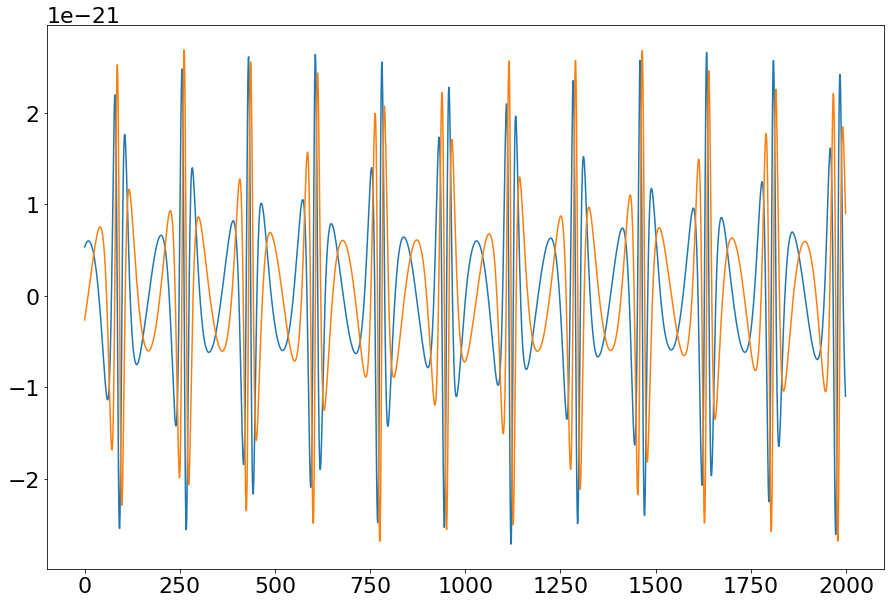

In [84]:
plt.plot(h.real[:2000]);
plt.plot(h.imag[:2000]);

In [47]:
15*2000/(3600)

8.333333333333334

# Compute just the (2,2) mode and mismatch with full waveform

In [138]:
from few.utils.utility import get_mismatch

We will use the FastSchwarzschildEccentricFlux model directly which gives the waveform in the source frame

In [139]:
few_base = FastSchwarzschildEccentricFlux()

In [145]:
M = 1e6
mu = 1e1
p0 = 12.0
e0 = 0.7
theta = np.pi/3.
phi = np.pi/4.
dist = 1.0
dt = 10.0
T = 0.1

wave_base = few_base(M, mu, p0, e0, theta, phi, dist=dist, dt=dt, T=T)

In [151]:
# l = 2, m = 2 wave
specific_modes = [(2, 2, n) for n in range(-30, 31)]

wave_22 = few_base(M, mu, p0, e0, theta, phi, dist=dist, dt=dt, T=T, mode_selection=specific_modes)


print('mismatch with full wave:', get_mismatch(wave_22, wave_base))

mismatch with full wave: 0.06289801699889497


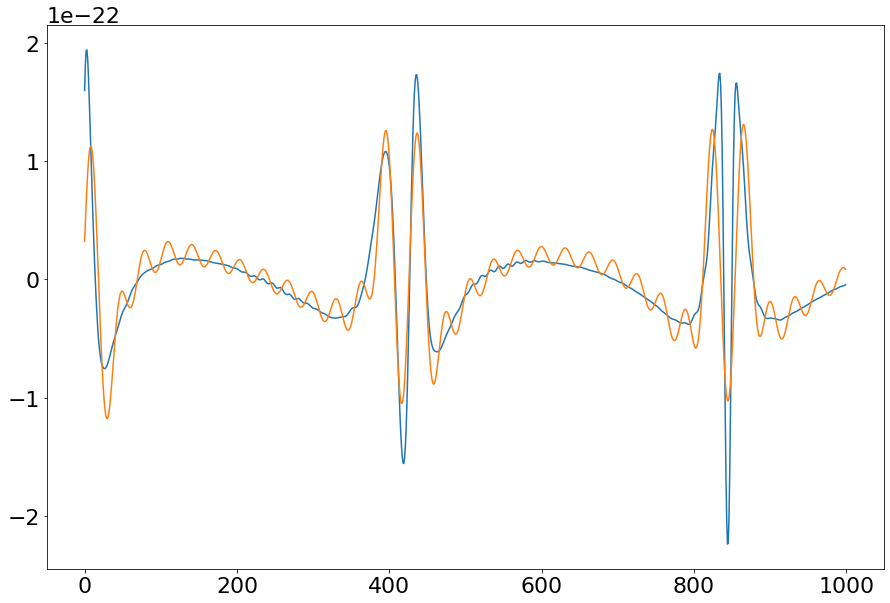

In [150]:
plt.plot(wave_base.real[:1000])
plt.plot(wave_22.real[:1000])

## Phase space trajectory

In [85]:
from few.trajectory.inspiral import EMRIInspiral

In [86]:
# initialize trajectory class
traj = EMRIInspiral(func="SchwarzEccFlux")

In [87]:
# set initial parameters
M = 1e5
mu = 1e1
p0 = 20.0
e0 = 0.5

# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
t, p, e, x, Phi_phi, Phi_theta, Phi_r = traj(M, mu, 0.0, p0, e0, 1.0)

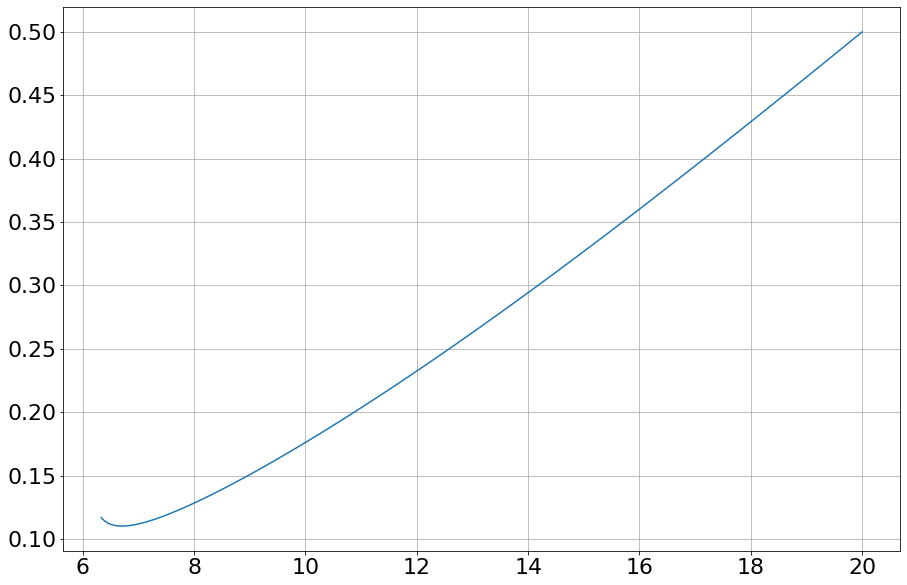

In [88]:
plt.grid(True)
plt.plot(p,e);

# Waveforms for generic insprials into a Kerr black hole

FEW does not yet currently support adiabatic, relativistic, inspirals into a Kerr black hole but it can use the latest kludge models with 5PN trajectories to compute waveforms with all the correct phenomological features. This is very useful for mock data challenges.

In [89]:
from few.waveform import Pn5AAKWaveform

In [90]:
# parameters
T = 1  # years
dt = 15.0  # seconds
M = 1e6
a = 0.998
mu = 100
p0 = 12.0
e0 = 0.5
x0 = 0.6  # notice this is x_I, not Y. The AAK waveform can convert to Y.
qK = 0.2  # polar spin angle
phiK = 0.2  # azimuthal viewing angle
qS = 0.3  # polar sky angle
phiS = 0.3  # azimuthal viewing angle
dist = 1.0  # distance
Phi_phi0 = 1.0
Phi_theta0 = 2.0
Phi_r0 = 3.0

h = gen_wave(
    M,
    mu,
    a,
    p0,
    e0,
    x0,
    dist,
    qS,
    phiS,
    qK,
    phiK,
    Phi_phi0,
    Phi_theta0,
    Phi_r0,
    T=T,
    dt=dt,
)

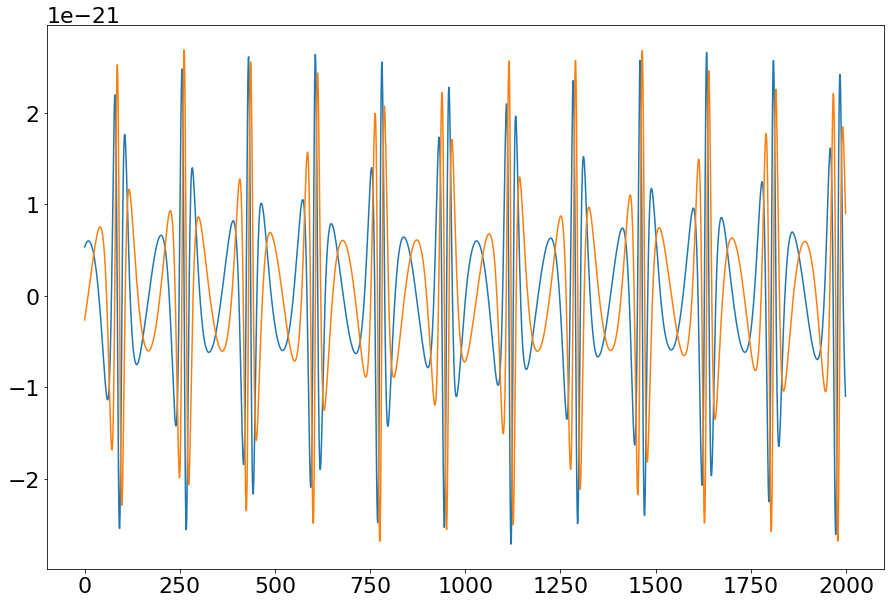

In [91]:
plt.plot(h.real[:2000])
plt.plot(h.imag[:2000])

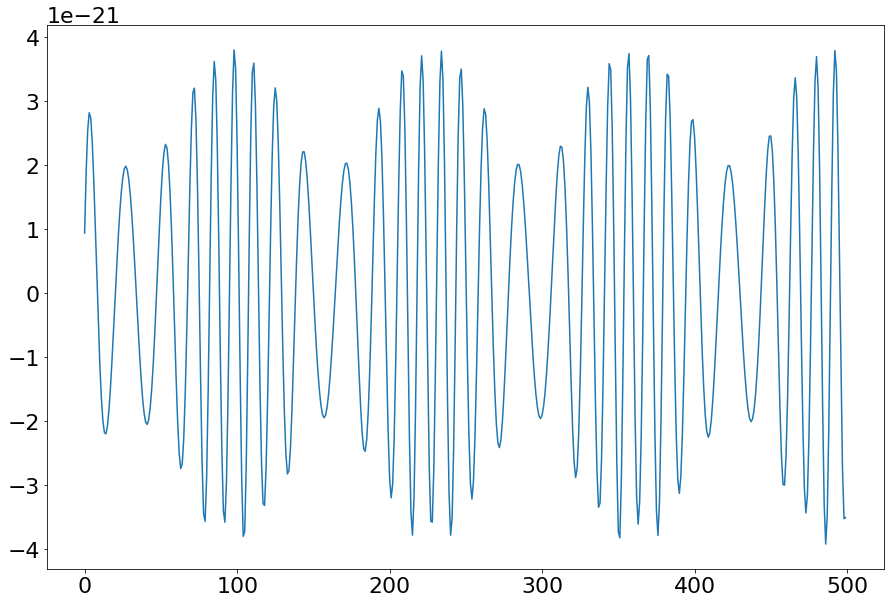

In [92]:
plt.plot(h.real[-500:])